## Dynamic graph construction

In [13]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import cdist
import networkx as nx
import matplotlib.pyplot as plt

In [14]:
tickers = pd.read_csv('data/tickers_list.csv')['Symbol'].tolist()
#tickers

In [15]:
df = pd.read_csv('data/values.csv')
df = df[df['Symbol'].isin(tickers)]
df = df[['Symbol','Date','Close']]
#df.set_index('Symbol', inplace=True)
df['Date'] = pd.to_datetime(df['Date'],utc=True)
df['Date'] = df['Date'].dt.date
close_prices = df.pivot(index='Date', columns='Symbol', values='Close')
close_prices

Symbol,AAPL,ABBV,ABT,ACN,ADBE,AIG,AMD,AMGN,AMT,AMZN,...,UBER,UNH,UNP,UPS,USB,V,VZ,WFC,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2023-03-30,160.191223,141.692886,93.415222,271.087097,381.899994,46.912170,97.879997,221.357010,181.795578,102.000000,...,31.190001,446.575684,186.125900,165.494385,31.145750,217.816406,31.539310,34.781734,47.004467,99.518143
2023-03-31,162.697281,142.993851,95.470581,274.108154,385.369995,47.420647,98.010002,221.586166,184.651123,103.290001,...,31.700001,448.979309,188.847031,168.005936,31.672901,220.853088,31.726948,34.781734,47.578835,99.672684
2023-04-03,163.950302,143.935974,95.781700,274.136902,380.079987,47.477146,96.559998,224.051743,181.723297,102.410004,...,31.459999,469.500092,187.233124,167.772125,31.312681,224.320770,31.996168,35.098103,47.978951,105.553406
2023-04-04,163.417542,143.361725,96.922531,274.136902,385.149994,46.959248,95.870003,226.884048,183.846863,103.949997,...,31.389999,468.607086,183.798859,165.078690,30.803108,223.008118,32.346958,34.251350,47.507851,104.544502
2023-04-05,161.572495,144.276947,98.251907,269.811554,382.019989,47.307652,92.559998,232.236969,184.967407,101.099998,...,31.120001,483.788727,182.231873,164.030762,30.847033,223.507706,32.722240,34.325783,48.295181,106.335083
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2026-01-12,260.250000,218.283737,124.011818,280.959991,327.649994,74.089996,207.690002,325.540009,171.529999,246.470001,...,84.669998,340.510010,229.500000,108.029999,54.389999,343.200012,39.840000,94.959999,117.970001,124.029999
2026-01-13,261.049988,218.988083,123.673531,276.799988,309.929993,72.290001,220.970001,324.299988,173.960007,242.600006,...,85.410004,333.929993,229.289993,106.580002,54.049999,327.880005,39.009998,93.559998,120.360001,126.540001
2026-01-14,259.959991,220.118973,124.370003,288.540009,304.440002,73.040001,223.600006,328.970001,177.479996,236.649994,...,84.650002,334.959991,227.139999,107.400002,53.500000,329.170013,39.830002,89.250000,120.040001,130.199997


In [16]:
return_threshold=0.01

In [17]:
# ---------------------------------------------------------
# 1. Daily Movement Labeling
# ---------------------------------------------------------
# Formula: return = p_t / p_{t-1} - 1
returns = close_prices.pct_change()

# Initialize all labels as 0 (Neutral)
labels = pd.DataFrame(0, index=returns.index, columns=returns.columns)

# Apply thresholding logic:
# Upward trend (+1): return > positive threshold
labels[returns > return_threshold] = 1

# Downward trend (-1): return < negative threshold
labels[returns < -return_threshold] = -1

# Drop the first row (NaN from pct_change)
labels = labels.iloc[1:]

In [18]:
labels

Symbol,AAPL,ABBV,ABT,ACN,ADBE,AIG,AMD,AMGN,AMT,AMZN,...,UBER,UNH,UNP,UPS,USB,V,VZ,WFC,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2023-03-31,1,0,1,1,0,1,0,0,1,1,...,1,0,1,1,1,1,0,0,1,0
2023-04-03,0,0,0,0,-1,0,-1,1,-1,0,...,0,1,0,0,-1,1,0,0,0,1
2023-04-04,0,0,1,0,1,-1,0,1,1,1,...,0,0,-1,-1,-1,0,1,-1,0,0
2023-04-05,-1,0,1,-1,0,0,-1,1,0,-1,...,0,1,0,0,0,0,1,0,1,1
2023-04-06,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,1,0,0,1,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2026-01-12,0,0,-1,0,-1,-1,1,0,1,0,...,0,-1,0,0,-1,-1,0,-1,1,0
2026-01-13,0,0,0,-1,-1,-1,1,0,1,-1,...,0,-1,0,-1,0,-1,-1,-1,1,1
2026-01-14,0,0,0,1,-1,1,1,1,1,-1,...,0,0,0,0,-1,0,1,-1,0,1


In [19]:
window_size = 20
t = window_size+30  # Delta_t

timestamps = labels.index

current_date = timestamps[t]
        
# Extract the sequence for the window [t - Delta_t + 1 : t]
# Shape: (Window_Size, Num_Stocks)
window_data = labels.iloc[t-window_size : t]

# Transpose to (Num_Stocks, Window_Size) so each row is a stock's sequence
stock_sequences = window_data.values.T 

# -----------------------------------------------------
# 3. Similarity Measurement (Manhattan Distance)
# -----------------------------------------------------
# We use scipy's cdist with 'cityblock' (Manhattan) metric.
# This calculates Equation (6) efficiently for all pairs.
# d_ij = sum(|l_s^i - l_s^j|)
dist_matrix = cdist(stock_sequences, stock_sequences, metric='cityblock')

In [20]:
stock_sequences

array([[ 0,  0,  0, ...,  1,  0,  1],
       [ 0, -1,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       ...,
       [ 1,  0,  1, ...,  0,  0,  0],
       [ 0, -1,  0, ...,  1,  0,  0],
       [ 0, -1,  1, ...,  0,  0,  0]])

In [21]:
dist_matrix

array([[ 0., 13., 11., ..., 15.,  7., 15.],
       [13.,  0.,  6., ..., 14., 10., 12.],
       [11.,  6.,  0., ..., 12., 10., 12.],
       ...,
       [15., 14., 12., ...,  0., 12., 10.],
       [ 7., 10., 10., ..., 12.,  0., 12.],
       [15., 12., 12., ..., 10., 12.,  0.]])

In [22]:
max_dist_threshold = 7
adj_matrix = np.where(dist_matrix <= max_dist_threshold, 1, 0)

In [23]:
np.fill_diagonal(adj_matrix, 0)  # No self-loops
adj_matrix

array([[0, 0, 0, ..., 0, 1, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

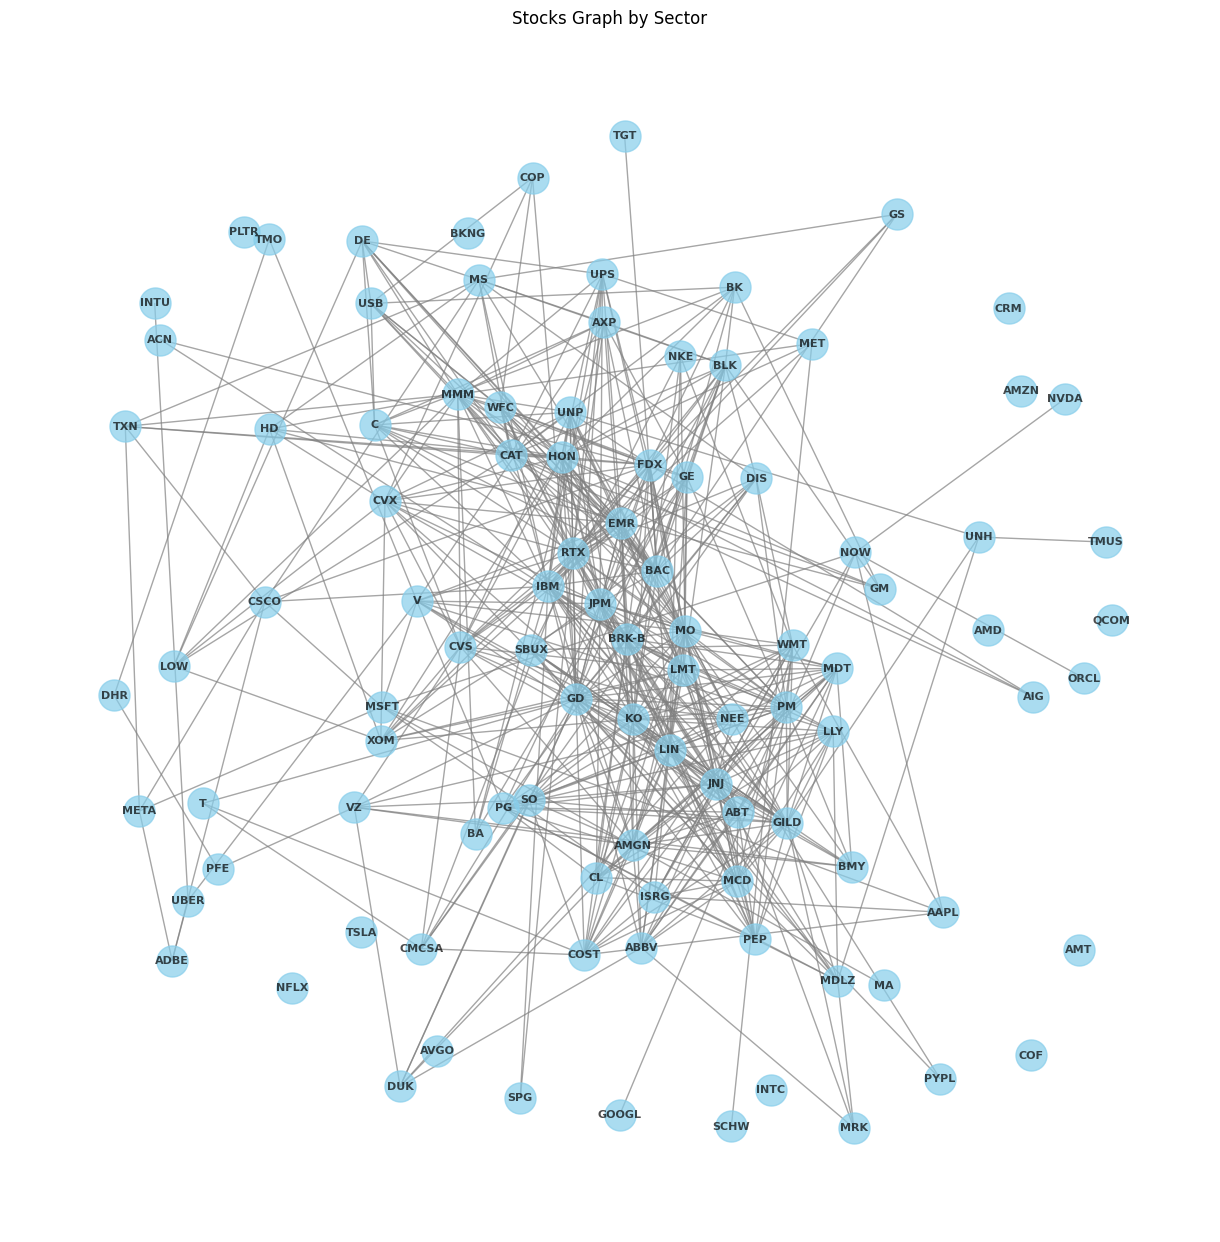

In [24]:
stocks_graph = nx.from_numpy_array(adj_matrix)
stocks_graph = nx.relabel_nodes(stocks_graph, dict(enumerate(tickers)))

# 2. CONVERT to a NetworkX Graph Object (This is the missing step)
G = stocks_graph

# 3. Now draw the Graph object 'G', not the matrix
plt.figure(figsize=(12, 12)) # Increased height for better visibility

# Calculate layout based on the Graph object G
pos = nx.spring_layout(G, k=0.5, iterations=20) 

nx.draw(
    G,                  # Pass G here
    pos=pos,            # Use the calculated layout
    with_labels=True, 
    node_size=500, 
    node_color='skyblue', 
    font_size=8, 
    font_weight='bold', 
    font_color='black',
    edge_color='gray',  # Added explicitly to ensure edges are visible
    alpha=0.7           # Transparency
)

plt.title('Stocks Graph by Sector')
plt.show()